## This notebook can be used to compare reconstructions from the dense representation of DeepSVG models

It should be run using the environment created from the requirements.txt file in the SVGRepresentation folder.

The following code expects the folder 'SVG_Data' to be in the same directory as the cloned project repository.
```
parent/
    ├── SVG_Data
    └── SVG_LogoGenerator
```
If this is not the case on your machine make sure to
* set the correct path to the SVG_Data folder here:



In [1]:
datafolder = "../../../SVG_Data/"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir("../deepsvg")

In [4]:
from deepsvg.svglib.svg import SVG
from deepsvg import utils
from deepsvg.difflib.tensor import SVGTensor
from deepsvg.svglib.geom import Bbox
from deepsvg.svgtensor_dataset import load_dataset as load_tensor_dataset
from deepsvg.utils.utils import batchify
import torch


In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

 ### Helpers:


In [6]:
def load_svg(filename):
    svg = SVG.load_svg(filename)
    svg = dataset.simplify(svg)
    svg = dataset.preprocess(svg, augment=False)
    return svg

In [7]:
def encode(data):
    model_args = batchify((data[key] for key in cfg.model_args), device)
    with torch.no_grad():
        z = model(*model_args, encode_mode=True)
        return z

def encode_icon(idx):
    data = dataset.get(id=idx, random_aug=False)
    return encode(data)
    
def encode_svg(svg):
    data = dataset.get(svg=svg)
    return encode(data)

def decode(z, do_display=True, return_svg=False, return_png=False):
    commands_y, args_y = model.greedy_sample(z=z)
    tensor_pred = SVGTensor.from_cmd_args(commands_y[0].cpu(), args_y[0].cpu())
    svg_path_sample = SVG.from_tensor(tensor_pred.data, viewbox=Bbox(256), allow_empty=True).normalize().split_paths().set_color("random")
    
    if return_svg:
        return svg_path_sample
    
    return svg_path_sample.draw(do_display=do_display, return_png=return_png)

In [8]:
def show_original_and_reconstruction(idx):
    data = dataset.get(id=idx, random_aug=False, model_args=["tensor_grouped"])
    tensor_target = data["tensor_grouped"][0].copy().drop_sos().unpad()
    svg = SVG.from_tensor(tensor_target.data, viewbox=Bbox(256)).normalize().split_paths().set_color("random")
    svg.draw()
    print("reconstruction:")
    decode(encode_icon(idx))

In [9]:
# some meaningful indices to try
doll=1
homer=28
the_cloud=46
teams = 63
reddit = 65
tinder = 68
mac_finder = 120
ios=124
dropbox=137
gmail=166
bell=167
yarnball=173
camera=175
google_maps=176
google_photos=179
slack_old=189
slack_new=190
windows=196
visual_studio=205
chick_in_egg=256
arrow_up = 390
flame=437
pisces=454
baby_feet=468
family=512
ball=535
cake=536
phantom=692
eyeball=747
superman =759
heisenberg=776
schoolbus=840
glasses=966

indices = [doll, homer,the_cloud,teams,reddit,tinder,mac_finder,ios,dropbox,gmail,bell,yarnball,camera,google_maps,google_photos,
       slack_old,slack_new,windows,visual_studio,chick_in_egg,arrow_up,flame,pisces,baby_feet,family,ball,cake,phantom,
       eyeball,superman,heisenberg,schoolbus,glasses]

### Load pretrained model that comes with DeepSVG and check out its reconstructions

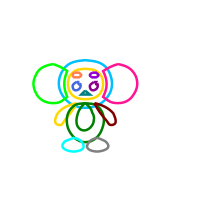

reconstruction:
icon not representable by this model


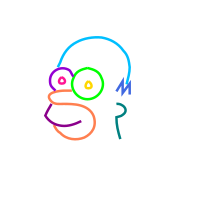

reconstruction:
icon not representable by this model


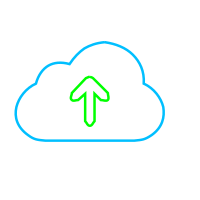

reconstruction:


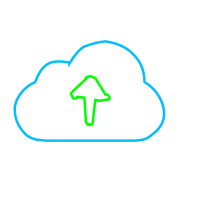

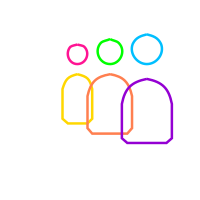

reconstruction:


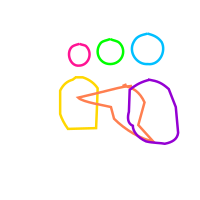

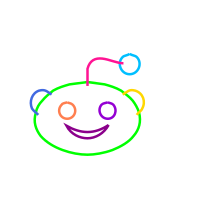

reconstruction:


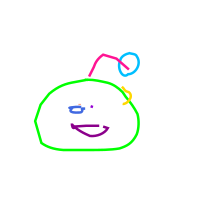

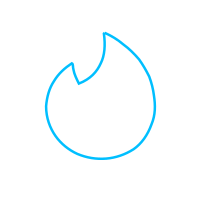

reconstruction:


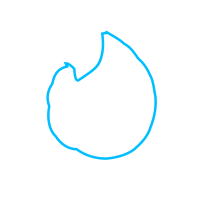

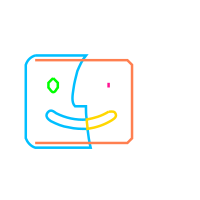

reconstruction:


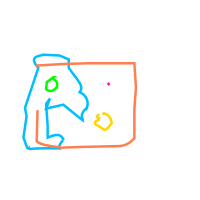

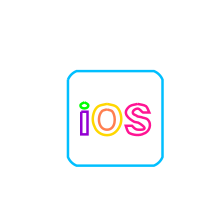

reconstruction:


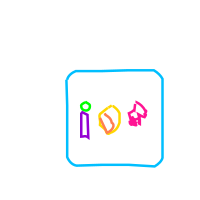

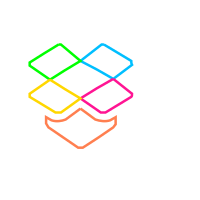

reconstruction:


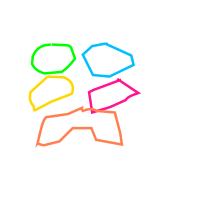

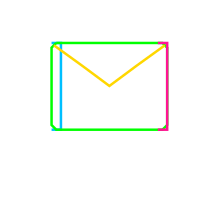

reconstruction:


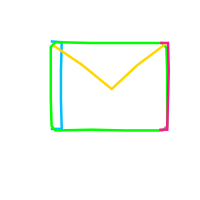

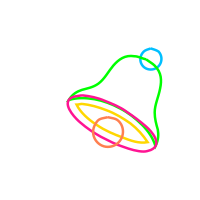

reconstruction:


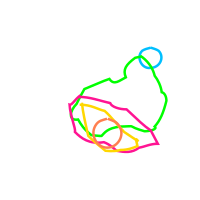

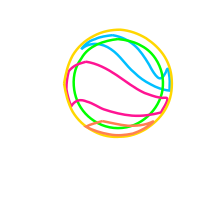

reconstruction:


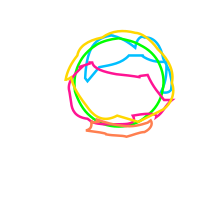

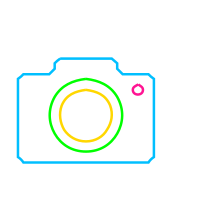

reconstruction:


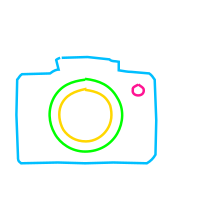

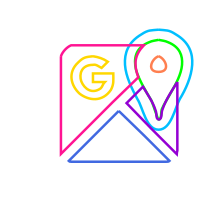

reconstruction:


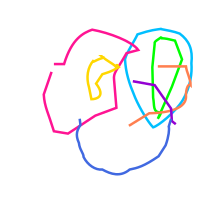

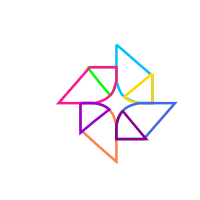

reconstruction:


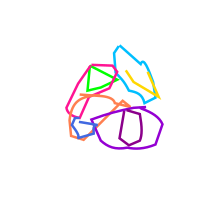

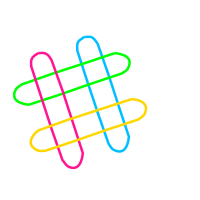

reconstruction:


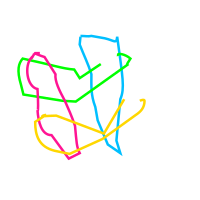

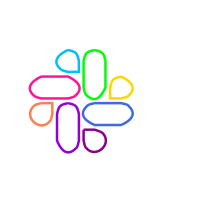

reconstruction:


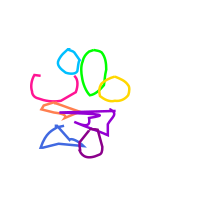

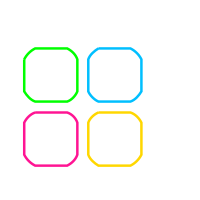

reconstruction:


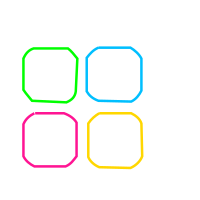

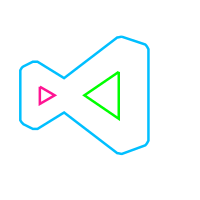

reconstruction:


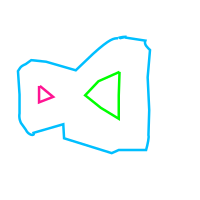

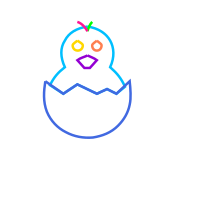

reconstruction:


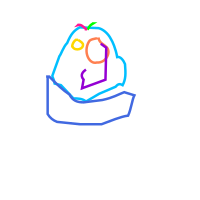

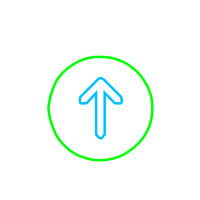

reconstruction:


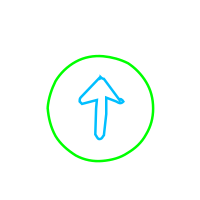

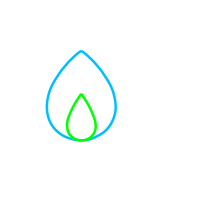

reconstruction:


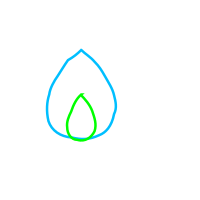

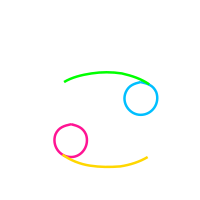

reconstruction:


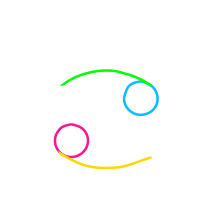

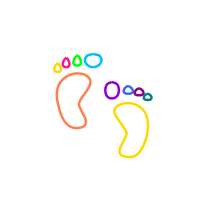

reconstruction:
icon not representable by this model


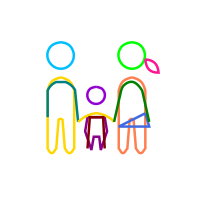

reconstruction:
icon not representable by this model


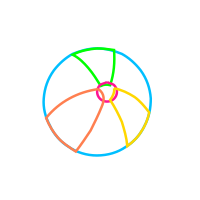

reconstruction:


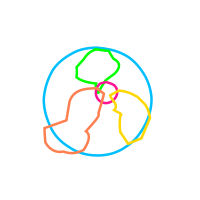

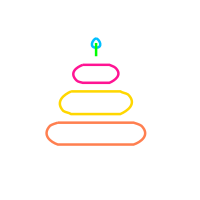

reconstruction:


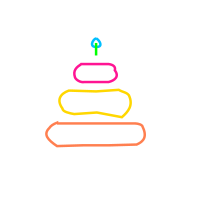

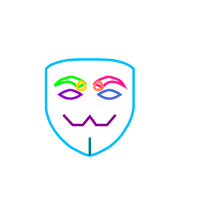

reconstruction:
icon not representable by this model


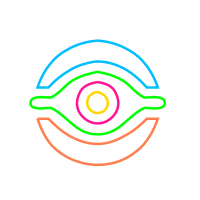

reconstruction:


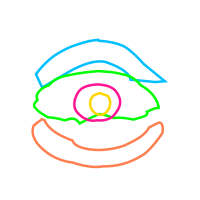

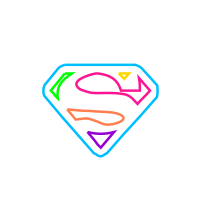

reconstruction:


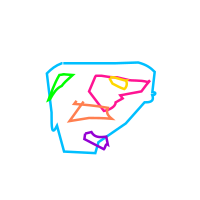

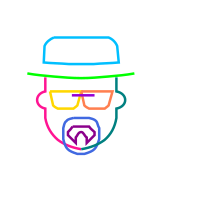

reconstruction:
icon not representable by this model


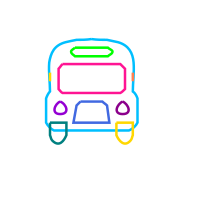

reconstruction:
icon not representable by this model


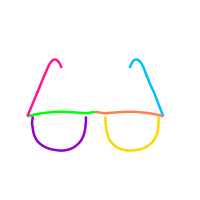

reconstruction:


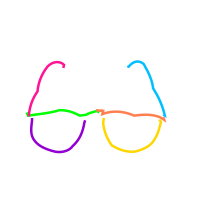

In [10]:
pretrained_path = os.path.join(datafolder,"deepsvg_pretrained_model/hierarchical_ordered.pth.tar")
from configs.deepsvg.hierarchical_ordered_correct_paths import Config

cfg = Config()
model = cfg.make_model().to(device)
utils.load_model(pretrained_path, model)
model.eval()

dataset = load_tensor_dataset(cfg)

for idx in indices:
    try: 
        show_original_and_reconstruction(idx)
    except: 
        print("icon not representable by this model")

### Load the from scratch trained model and check out its reconstructions

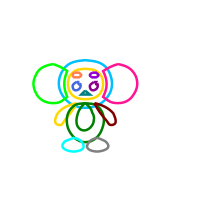

reconstruction:


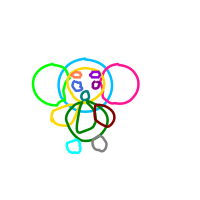

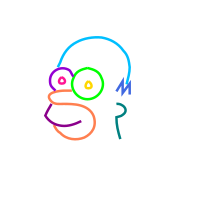

reconstruction:


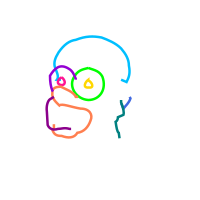

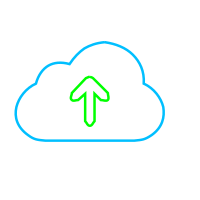

reconstruction:


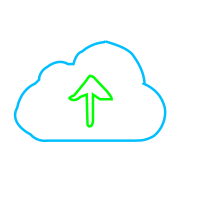

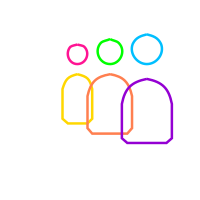

reconstruction:


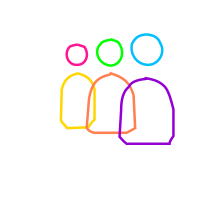

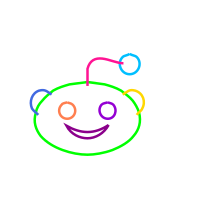

reconstruction:


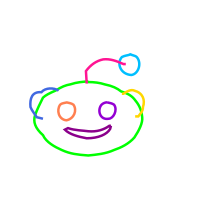

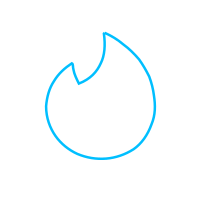

reconstruction:


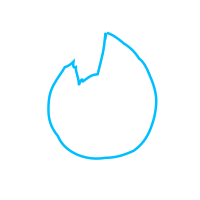

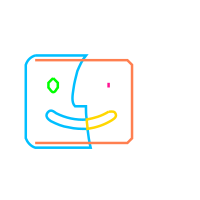

reconstruction:


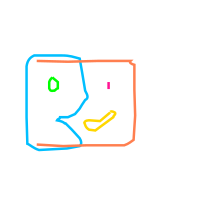

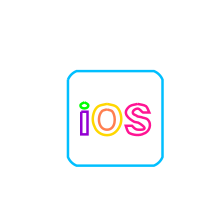

reconstruction:


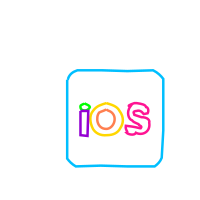

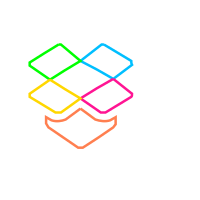

reconstruction:


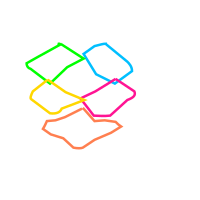

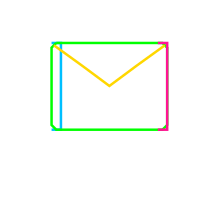

reconstruction:


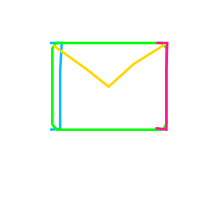

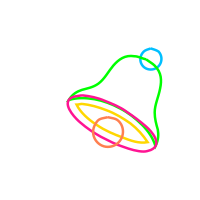

reconstruction:


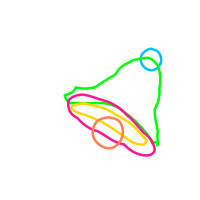

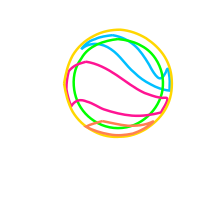

reconstruction:


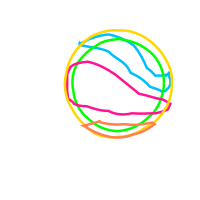

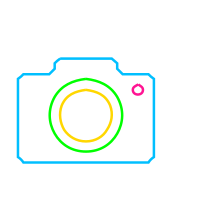

reconstruction:


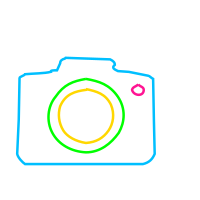

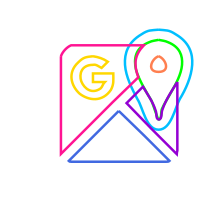

reconstruction:


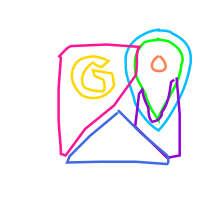

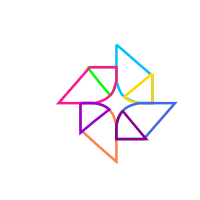

reconstruction:


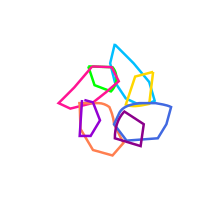

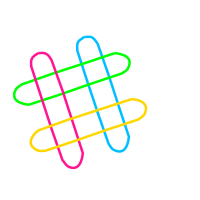

reconstruction:


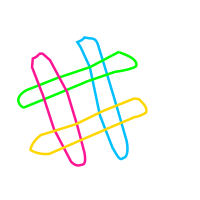

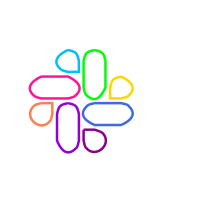

reconstruction:


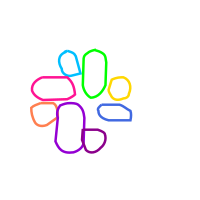

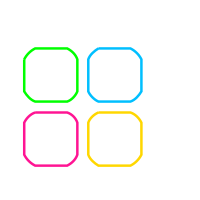

reconstruction:


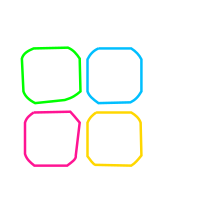

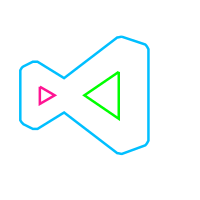

reconstruction:


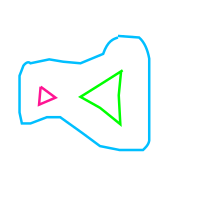

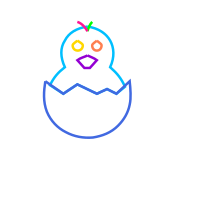

reconstruction:


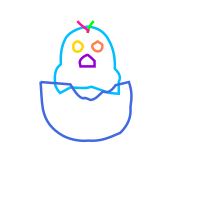

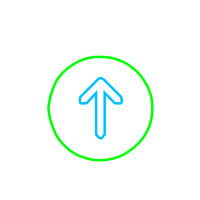

reconstruction:


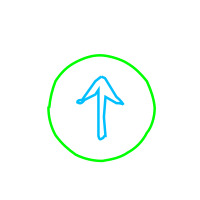

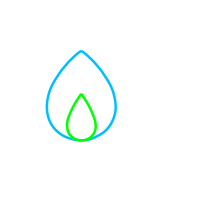

reconstruction:


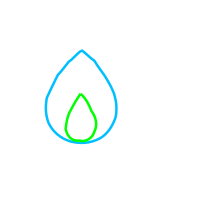

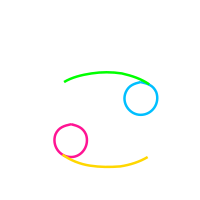

reconstruction:


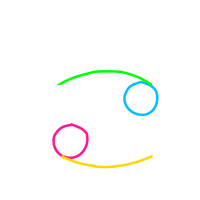

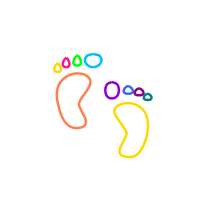

reconstruction:


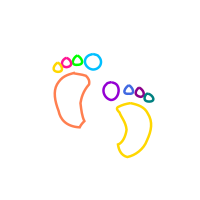

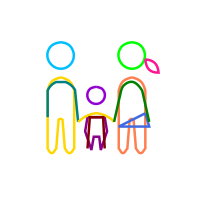

reconstruction:


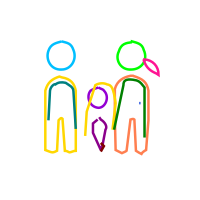

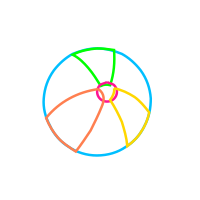

reconstruction:


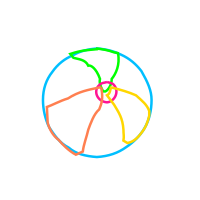

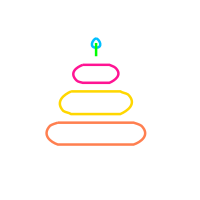

reconstruction:


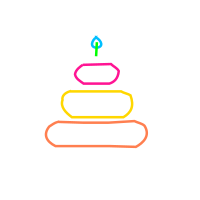

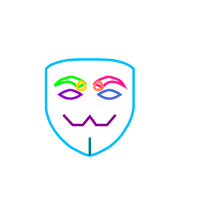

reconstruction:


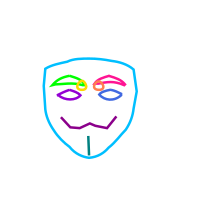

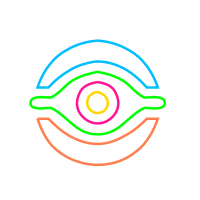

reconstruction:


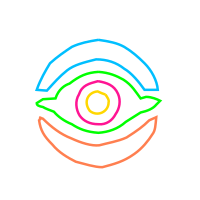

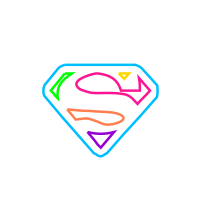

reconstruction:


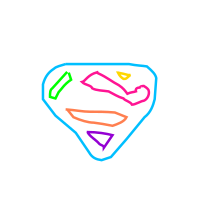

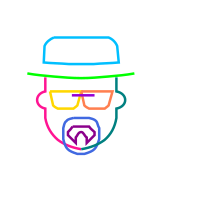

reconstruction:


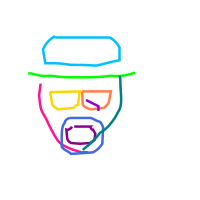

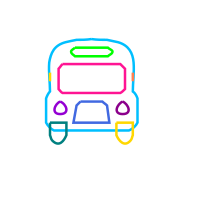

reconstruction:


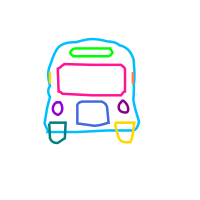

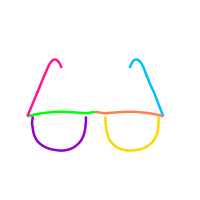

reconstruction:


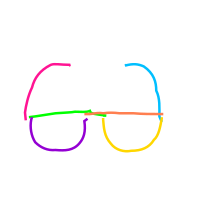

In [11]:
scratch_trained_path = os.path.join(datafolder, "deepsvg_training_logs/16g-62seq-128c-256z-deepsvg-icons/models/deepsvg/hierarchical_ordered_new_data/best.pth.tar")
from configs.deepsvg.hierarchical_ordered_new_data import Config

cfg = Config()
model = cfg.make_model().to(device)
utils.load_model(scratch_trained_path, model)
model.eval();

dataset = load_tensor_dataset(cfg)

for idx in indices:
    try: 
        show_original_and_reconstruction(idx)
    except: 
        print("icon not representable by this model")